In [573]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
# from plotly.graph_objs import Figure, Histogram, Layout

In [575]:
pd.set_option('display.max_columns', 50)

# Creating the dataframes

In [576]:
countries = ['US', 'DE', 'CA', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU']
dframes = [code.lower()+'_df' for code in countries]

cat_ids = pd.read_csv('yt category list.csv', delimiter=' - ', engine='python')
for code, df in zip(countries, dframes):
    globals()[df] = pd.read_csv(f'{code}videos.csv', parse_dates=['trending_date', 'publish_time'], \
                                encoding_errors='ignore').merge(cat_ids, on='category_id', how='inner')\
                                .drop(['category_id', 'thumbnail_link'], axis=1)
    
us_df.head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,17.14.11,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs


In [577]:
# we now have a dataframe for each of the countries
# we need to merge and identify the dataframes we've merged

df_list = []
for code, df in zip(countries, dframes):
    globals()[df]['country'] = code
    df_list.append(globals()[df])
    
df = pd.concat(df_list)
df.tail(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category,country
40736,8awubzxKVGg,18.13.06,Вашингтон. Орёл и Решка. Перезагрузка. АМЕРИК...,Орел и Решка,2018-06-12 05:30:00+00:00,"орел и решка|""орел и решка перезагрузка""|""орел...",99583,2906,176,622,False,False,False,Орёл и Решка. Перезагрузка. АМЕРИКА (Heads an...,Travel & Events,RU
40737,UHIzVGIwH4g,18.14.06,"Деревня, которая не вымрет",varlamov,2018-06-13 14:18:05+00:00,"Голландия|""Нидерланды""|""Амстердам""|""каналы Амс...",62681,4196,51,759,False,False,False,"Сказочная Голландия! Пряничные домики, узкие у...",Travel & Events,RU
40738,9c-eJf_BcMw,18.02.01,Снежная королева 3. Огонь и лед,Три богатыря,2018-01-01 09:00:13+00:00,"Снежная королева|""Снежная королева 3""|""Снежная...",100049,1732,138,196,False,False,False,Редкий дар ввязываться во всевозможные неприят...,Movies,RU


# Cleaning up the raw data

In [578]:
# we need to reset the indexes as the merged dataframe contain its original indexes

df = df.reset_index().drop('index', axis=1)
df.tail(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category,country
375939,8awubzxKVGg,18.13.06,Вашингтон. Орёл и Решка. Перезагрузка. АМЕРИК...,Орел и Решка,2018-06-12 05:30:00+00:00,"орел и решка|""орел и решка перезагрузка""|""орел...",99583,2906,176,622,False,False,False,Орёл и Решка. Перезагрузка. АМЕРИКА (Heads an...,Travel & Events,RU
375940,UHIzVGIwH4g,18.14.06,"Деревня, которая не вымрет",varlamov,2018-06-13 14:18:05+00:00,"Голландия|""Нидерланды""|""Амстердам""|""каналы Амс...",62681,4196,51,759,False,False,False,"Сказочная Голландия! Пряничные домики, узкие у...",Travel & Events,RU
375941,9c-eJf_BcMw,18.02.01,Снежная королева 3. Огонь и лед,Три богатыря,2018-01-01 09:00:13+00:00,"Снежная королева|""Снежная королева 3""|""Снежная...",100049,1732,138,196,False,False,False,Редкий дар ввязываться во всевозможные неприят...,Movies,RU


In [579]:
# lets first remove some bias
# this will be videos with comments or ratings disabled
# this will also be videos with errors or has been removed

print(len(df))

df = df[~(df['comments_disabled'] | \
          df['ratings_disabled'] | \
          df['video_error_or_removed']) == True]

df = df.drop(['comments_disabled', 
              'ratings_disabled', 
              'video_error_or_removed'], axis=1)

375942


In [580]:
# lets also get rid of any null values, if existent
df = df.dropna()

In [581]:
# it also wouldn't be helpful to have nans in values later on
# so we'll remove any rows with int 0 in it
df = df.drop(df[df.isin([0]).any(axis = 1)].index)

In [584]:
# lets check out our cleaned up data
print(len(df))
df.head(3)

340681


,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,category,country,trending_delta
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,US,0 days 06:46:59
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,People & Blogs,US,206 days 17:12:28
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,US,2 days 08:59:57


In [585]:
# trending date is of type object, which is not valuable to us.
# lets make that a datetime object, then aggregate to find how long a video will take to trend

df['trending_date'] = pd.to_datetime(us_df['trending_date'], format='%y.%d.%m')
df['trending_delta'] = df['trending_date'] - df['publish_time'].dt.tz_localize(None)
df.head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,category,country,trending_delta
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,US,0 days 06:46:59
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,People & Blogs,US,206 days 17:12:28
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,US,2 days 08:59:57


# Analysis

In [ ]:
# lets also aggregate certain columns for better analysis

df['like_pct'] = 100 * round(df['likes'] / (df['likes'] + df['dislikes']), 2) # ratio of likes to dislikes
df['len_title'] = df['title'].str.findall(r'[.]*').str.len() # count chars in title
df['len_desc'] = df['description'].str.findall(r'[.]*').str.len() # count chars in desc
df['pct_cap'] = 100 * round(df['title'].str.findall(r'[A-Z]').str.len() /
                df['title'].str.findall(r'[A-Za-z]').str.len(), 2) # ratio of cap letters in title
df['qty_tags'] = df['tags'].str.split('|').str.len() # count number of tags

df.head(3)

## What is the main ingredient for a successful trending video?

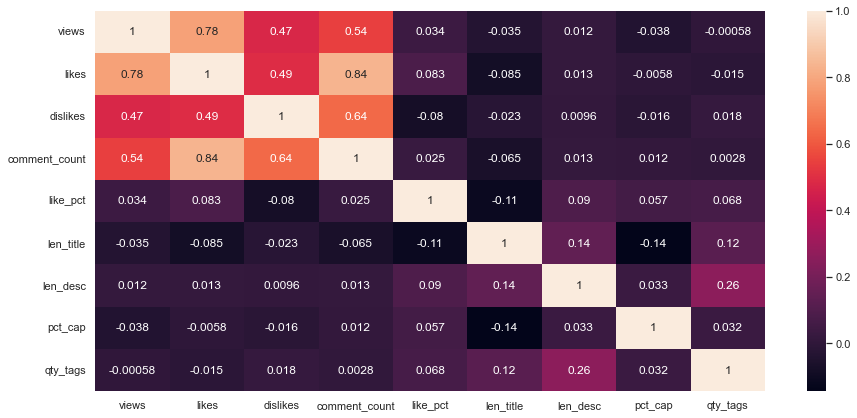

In [531]:
# lets create a correlation matrix with the base data and see what we get
sns.set(rc = {'figure.figsize':(15, 7)})
sns.heatmap(df.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='views', ylabel='dislikes'>

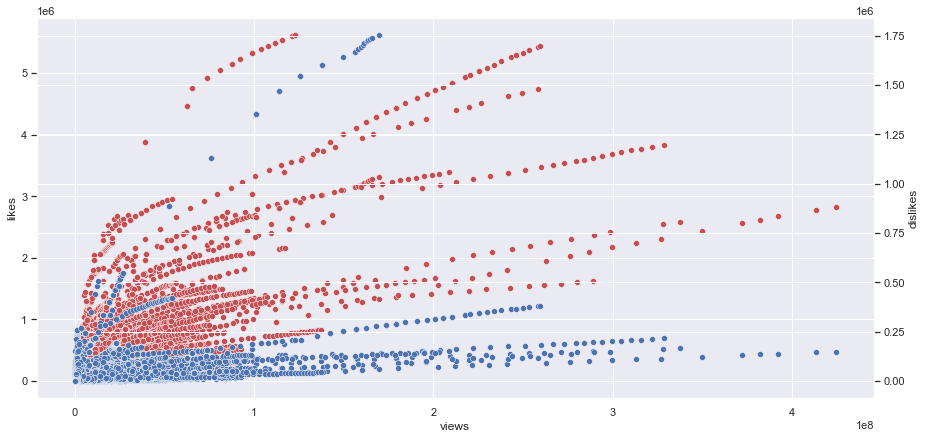

In [532]:
# as expected, we see a strong positive correlations between views and likes/dislikes

sns.scatterplot(x='views', y='likes', data=df, color = 'r')
sns.scatterplot(x='views', y='dislikes', data=df, color = 'b', ax = plt.twinx())

<AxesSubplot:xlabel='comment_count', ylabel='dislikes'>

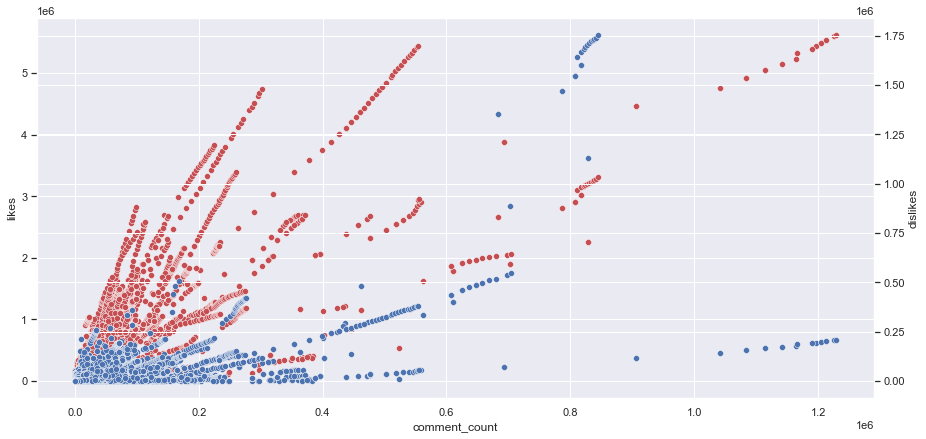

In [533]:
# there's also an obvious trend between the amount of likes/dislikes and the interactions (comments) people have

sns.scatterplot(x='comment_count', y='likes', data=df, color = 'r')
sns.scatterplot(x='comment_count', y='dislikes', data=df, color = 'b', ax = plt.twinx())

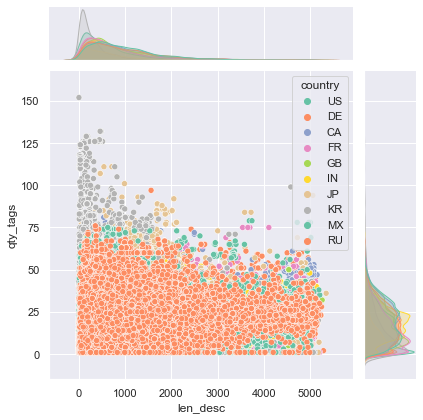

In [571]:
# there's also a correlation between the description length and qty. of tags
# which make sense, as creators who put in the time to write a lengthy description tend
# to also put in a good amount of tags to bring it viewers
sns.jointplot(x='len_desc', y='qty_tags', data=df, hue='country', palette='Set2')

In [ ]:
sns.kdeplot(x='len_desc', y='qty_tags', data=df, palette='Set2')

In [562]:
# for c in countries:
#     sns.kdeplot(x='len_desc', y='qty_tags', data=df[df['country'] == c], color = 'g')
#     plt.title(c)
#     plt.show()

<AxesSubplot:xlabel='len_desc', ylabel='qty_tags'>

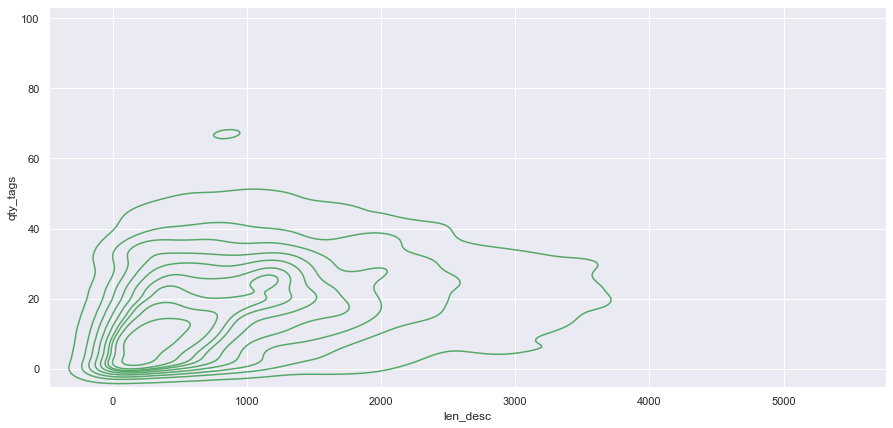

In [540]:


sns.kdeplot(x='len_desc', y='qty_tags', data=df[df['country'] == 'DE'], color = 'g')

In [ ]:
df['']

## Let's group by category and perform some aggregations and analysis

<AxesSubplot:xlabel='views', ylabel='category'>

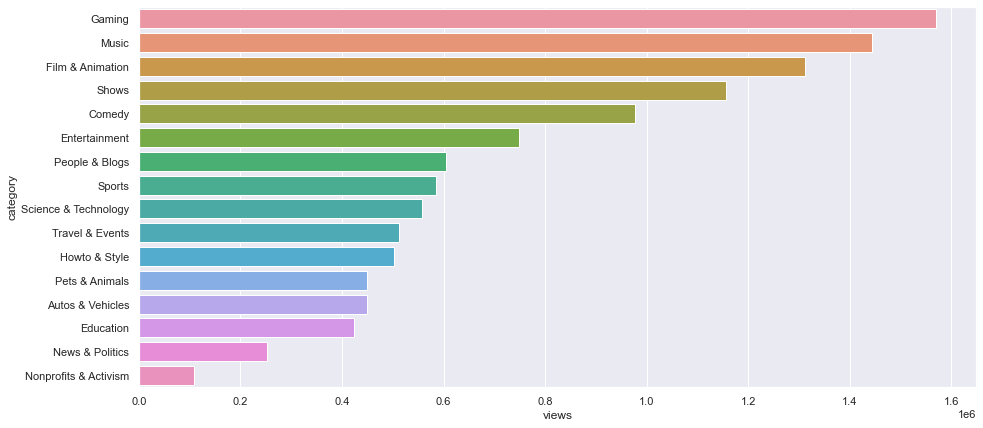

In [461]:
# we can group by categories and plot viewcount by its median
# as there are many outliers, the median tends to be a better metric than the mean

df2 = df.groupby('category').median().reset_index().sort_values('views', ascending=False)
sns.barplot(x='views', y='category', data = df2)

<AxesSubplot:xlabel='len_title', ylabel='category'>

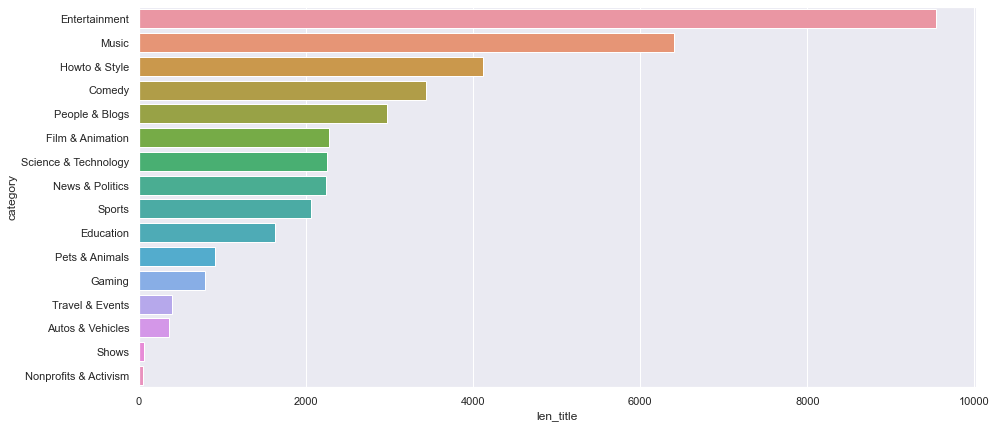

In [464]:
# we can also see how title length differ from 

df3 = df.groupby('category').agg({'len_title': 'count'}).reset_index(
            ).sort_values('len_title', ascending=False)

sns.barplot(x = 'len_title', y = 'category', data = df3)

## Analyzing video titles

<AxesSubplot:xlabel='len_title', ylabel='Count'>

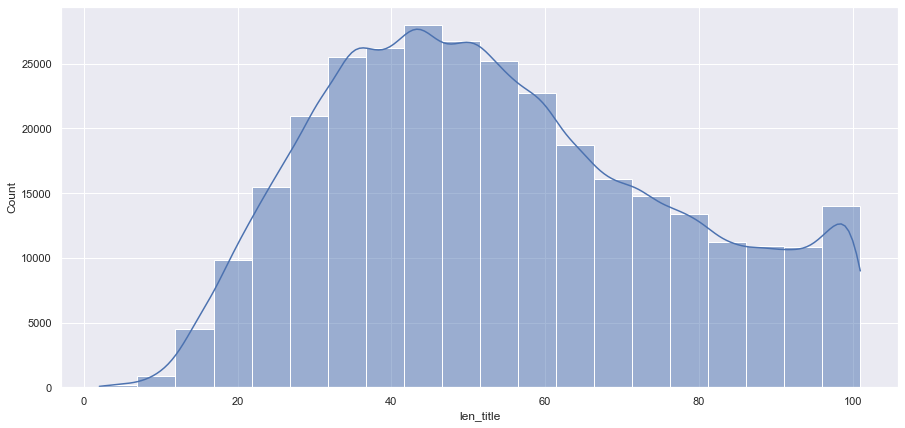

In [566]:
# it looks like the average title length is between 40-60 characters long

sns.histplot(x=df['len_title'], data=df, kde=True, bins=20)

In [506]:
df[df['title'].isin(['one piece'])]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,category,trending_delta,like_pct,len_title,len_desc,pct_cap,qty_tags


In [504]:
# we can split up the strings and rank by occurences
# of course, we're going to have to navigate through this as there are 

df['title'].str.lower().str.split(' ').explode().value_counts().head(50)

# split(' ').explode().value_counts()

-            11308
|            10174
the           9544
a             4534
to            4126
in            3252
of            3003
with          2638
on            2230
and           2192
&             1993
my            1989
i             1979
trailer       1926
video)        1917
how           1804
for           1714
(official     1598
is            1597
official      1587
you           1576
2018          1451
at            1091
from          1064
ft.           1049
what           918
new            887
this           835
makeup         810
it             774
me             770
we             738
music          719
2              663
why            662
first          653
               651
[official      634
2017           615
by             611
your           576
make           569
vs.            566
out            563
day            557
game           542
full           536
about          534
black          529
show           512
Name: title, dtype: int64

In [ ]:
# however, we can see a more detailed view when we split the length by category
# it looks like the deviation sports and travel have the highest spread
# we can confirm that too by looking at the standard deviation values

sns.boxplot(x = 'len_title', y = 'category', data = df)

print(df.groupby('category').std()[['len_title']])

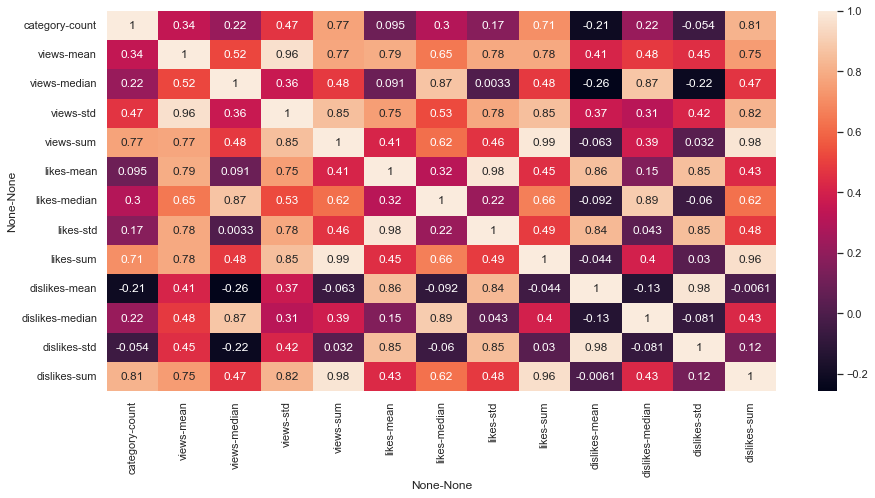

In [359]:
# aside from the obvious correlations, it's hard to make sense of the linear correlations
# so we'll take a step back, group by category, and perform some aggregations

df2 = df.groupby('category').agg({'category':['count'], \
                            'views': ['mean', 'median', 'std', 'sum'], \
                            'likes': ['mean', 'median', 'std', 'sum'], \
                            'dislikes': ['mean', 'median', 'std', 'sum']})

sns.heatmap(df2.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='len_title', ylabel='trending_date'>

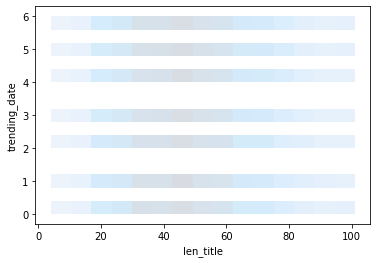

In [211]:
sns.histplot(x='len_title', data=df, y = df['trending_date'].dt.weekday, 
             bins = 15, palette='Set2', alpha = 0.2)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)

In [124]:
df.head(1)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,category,trending_delta,like_pct,len_title,len_desc,pct_cap,qty_tags
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0 days 06:46:59,95.0,35,1411.0,100.0,1


In [248]:
# for d in range(0,7):
#     sns.barplot(y=df['category'], x = 'views', data=df[df['trending_date'].dt.weekday == d]) # 0 is monday
#     plt.show()

<AxesSubplot:xlabel='views', ylabel='category'>

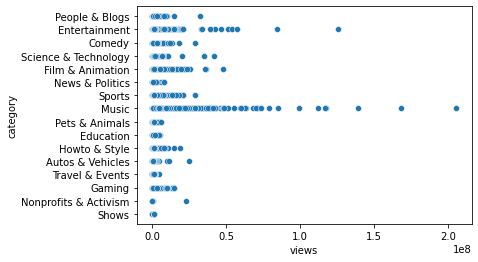

In [223]:
sns.scatterplot(y=df['category'], x = 'views', data=df[df['trending_date'].dt.weekday == 1]) # 0 is monday

In [250]:
sns.violinplot(y=df5['category'], x = df['trending_date'].dt.weekday, data=df) # 0 is monday

NameError: name 'df5' is not defined

## On average, how long does it take for a video to trend?

In [ ]:
df.head(1)

<AxesSubplot:xlabel='len_title', ylabel='Count'>

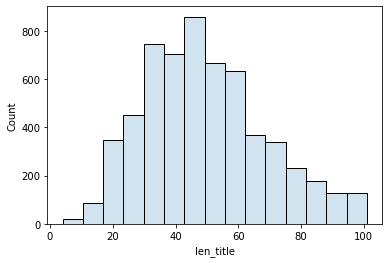

In [94]:
sns.histplot(x='len_title', data=df[df['trending_date'].dt.weekday == 1], 
             bins = 15, palette='Set2', alpha = 0.2)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)

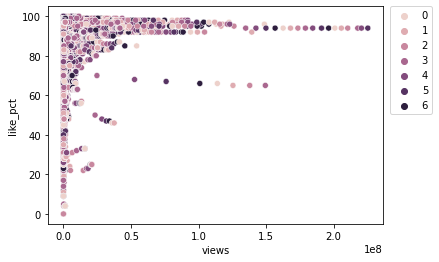

In [70]:
# additionally, it may be helpful to look a bit closer at the like-dislike ratio
sns.scatterplot(x='views', y='like_pct', data=df, hue='len_title')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)

In [595]:
df.loc[[24]].tags

24    [none]
Name: tags, dtype: object

<AxesSubplot:xlabel='pct_cap', ylabel='like_pct'>

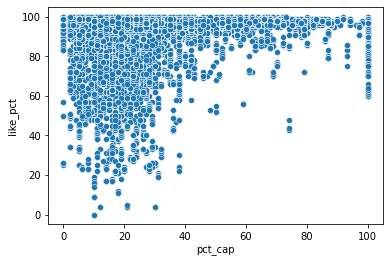

In [597]:
sns.scatterplot(x='pct_cap', y='like_pct', data=df)

/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_25012/3278285594.py:1: FutureWarning: ['video_id', 'trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'description', 'trending_delta'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  b = df.groupby('category').agg(['mean', 'std', 'sum', 'median'])


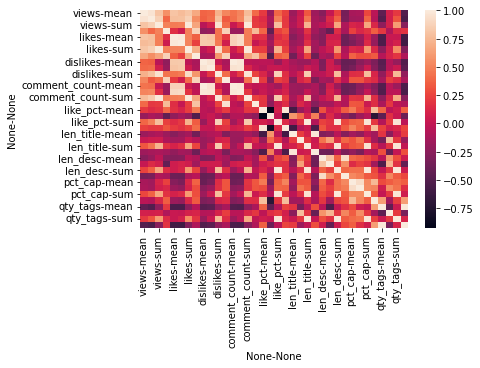

In [640]:
b = df.groupby('category').agg(['mean', 'std', 'sum', 'median'])
sns.heatmap(b.corr())
plt.show()

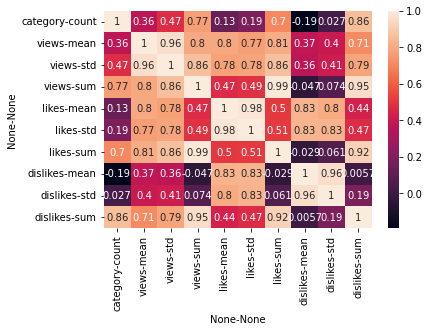

In [641]:
a = df.groupby('category').agg({'category':['count'], \
                            'views': ['mean', 'std', 'sum'], \
                            'likes': ['mean', 'std', 'sum'], \
                            'dislikes': ['mean', 'std', 'sum']})

sns.heatmap(a.corr(), annot=True)
plt.show()

In [258]:
a

,category,trending_date,count,views,likes
0,Entertainment,1,1399,2.061614e+06,92.434596
1,Entertainment,5,1379,1.972240e+06,92.662799
2,Entertainment,4,1362,2.022877e+06,92.649046
3,Entertainment,2,1360,2.147194e+06,92.603676
4,Entertainment,3,1359,2.223871e+06,92.354673
...,...,...,...,...,...
107,Shows,2,7,1.080305e+06,97.285714
108,Nonprofits & Activism,5,6,4.191917e+06,92.666667
109,Nonprofits & Activism,2,6,4.077136e+06,91.500000
110,Shows,3,6,1.048407e+06,97.333333


In [253]:
df['trending_date'].dt.weekday,

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,category,trending_delta,like_pct,len_title,len_desc,pct_cap,qty_tags
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,0 days 06:46:59,95.0,35,1411,100.0,1
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,People & Blogs,206 days 17:12:28,93.0,21,103,24.0,4
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,2 days 08:59:57,72.0,76,631,79.0,44
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11 18:08:04+00:00,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,217,456,Molly is an god damn amazing human and she cha...,People & Blogs,2 days 05:51:56,97.0,73,733,53.0,12
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11 01:19:33+00:00,wearing online dollar store makeup for a week|...,2744430,115426,1110,6541,I found this online dollar store called ShopMi...,People & Blogs,2 days 22:40:27,99.0,46,666,21.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,V6ElE2xs48c,2018-06-02,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10 21:01:22+00:00,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1324482,22413,608,1644,"On an island full of Van Gundys, Stan gets tal...",Shows,22 days 02:58:38,97.0,45,391,27.0,33
40945,V6ElE2xs48c,2018-06-03,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10 21:01:22+00:00,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1332252,22461,610,1648,"On an island full of Van Gundys, Stan gets tal...",Shows,23 days 02:58:38,97.0,45,391,27.0,33
40946,V6ElE2xs48c,2018-06-04,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10 21:01:22+00:00,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1340039,22504,615,1648,"On an island full of Van Gundys, Stan gets tal...",Shows,24 days 02:58:38,97.0,45,391,27.0,33
40947,V6ElE2xs48c,2018-06-05,Game of Zones - S5:E5: The Isle of Van Gundy,Bleacher Report,2018-05-10 21:01:22+00:00,"bleacher report|""br""|""nba""|""Stan Van Gundy""|""J...",1345086,22542,615,1649,"On an island full of Van Gundys, Stan gets tal...",Shows,25 days 02:58:38,97.0,45,391,27.0,33


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'Howto & Style'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'People & Blogs'),
  Text(5, 0, ' Film & Animation'),
  Text(6, 0, 'Science & Technology'),
  Text(7, 0, 'News & Politics'),
  Text(8, 0, 'Sports'),
  Text(9, 0, 'Education'),
  Text(10, 0, 'Pets & Animals'),
  Text(11, 0, 'Gaming'),
  Text(12, 0, 'Travel & Events'),
  Text(13, 0, 'Autos & Vehicles'),
  Text(14, 0, 'Shows'),
  Text(15, 0, 'Nonprofits & Activism')])

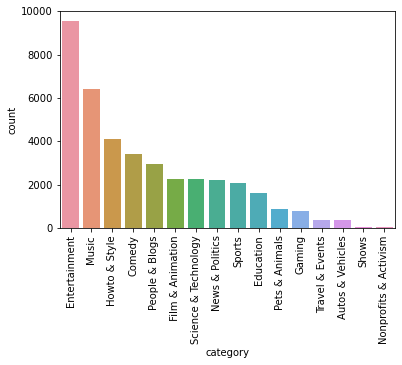

In [251]:
# lets first see how much of each category there is

df5 = df.groupby('category').agg(count=('category', 'count'),
                           views=('views', 'mean'), 
                           likes=('like_pct', 'mean')
                          ).sort_values(by='count', ascending=False).reset_index()

sns.barplot(x='category', y='count', data=df5, hue = df5)
plt.xticks(rotation=90)

In [647]:
df5.head(3)

,category,count,views,likes
0,Entertainment,9749,2.062894e+06,92.385270
1,Music,6447,6.213627e+06,96.396463
2,Howto & Style,4135,9.839684e+05,96.274970


<AxesSubplot:xlabel='like_pct', ylabel='Count'>

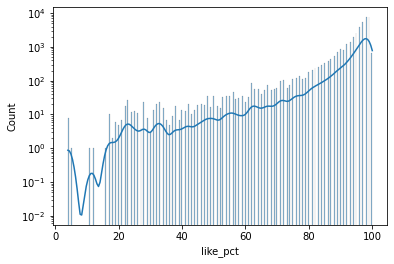

In [245]:
sns.histplot(x='like_pct', data=df, kde=True, log_scale=[False, True])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Howto & Style'),
  Text(1, 0, 'Gaming'),
  Text(2, 0, 'People & Blogs'),
  Text(3, 0, 'Pets & Animals'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Entertainment'),
  Text(6, 0, 'Travel & Events'),
  Text(7, 0, 'Music'),
  Text(8, 0, 'Sports'),
  Text(9, 0, 'Autos & Vehicles'),
  Text(10, 0, 'Science & Technology'),
  Text(11, 0, 'Shows'),
  Text(12, 0, ' Film & Animation'),
  Text(13, 0, 'Education'),
  Text(14, 0, 'News & Politics'),
  Text(15, 0, 'Nonprofits & Activism')])

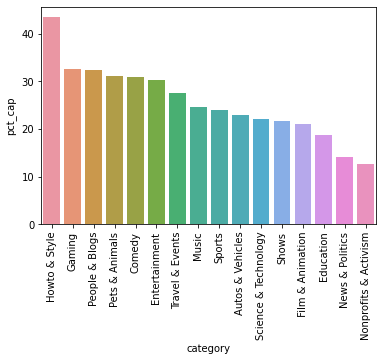

In [604]:
df3 = df.groupby('category').mean().reset_index().sort_values('pct_cap', ascending=False)
sns.barplot(x='category', y='pct_cap', data=df3)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='len_title', ylabel='like_pct'>

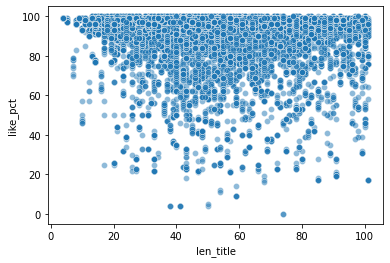

In [605]:
sns.scatterplot(x='len_title', y='like_pct', data=df, alpha=0.5)

<AxesSubplot:xlabel='len_desc', ylabel='Count'>

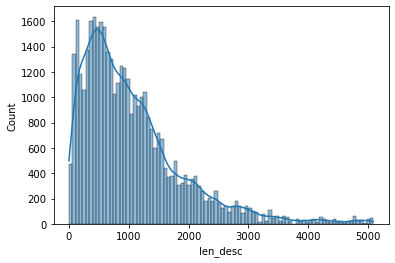

In [606]:
# the length of the description tends to skew to the left
# this may not necessarily mean that videos that write more tend to fail less
# it's of
sns.histplot(x='len_desc', data=df, kde=True)

0        1
1        1
2        1
3        1
4        1
        ..
40944    5
40945    6
40946    0
40947    1
40948    2
Name: trending_date, Length: 40230, dtype: int64

<AxesSubplot:xlabel='trending_delta'>

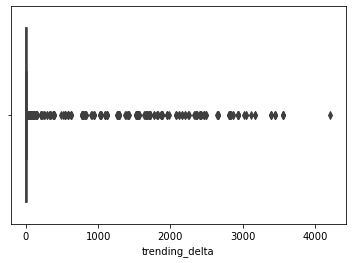

In [607]:
sns.boxplot(x=df['trending_delta'].dt.days, data=df)

<AxesSubplot:xlabel='qty_tags'>

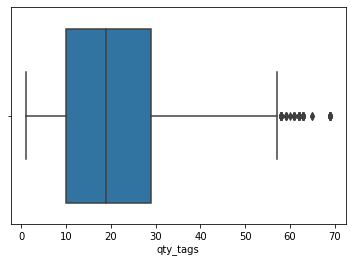

In [608]:
sns.boxplot(x='qty_tags', data=df)

In [ ]:
sns.histplot(data=df, x=df['trending_date'].dt.month, kde=True)

min: 11         max: 6


/Users/setone/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trending_date', ylabel='Density'>

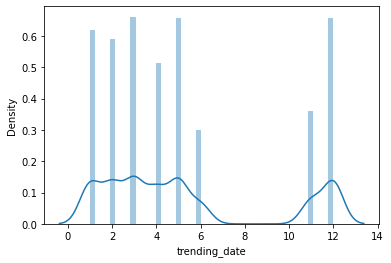

In [610]:
# lets take a look at the trending data
print(f"min: {df['trending_date'].dt.date.min().month} \
        max: {df['trending_date'].dt.date.max().month}")

# we unfortunately don't have a full complete year of trending data to analyze
sns.distplot(df['trending_date'].dt.month, )
# it would be extremely interesting to see, but it looks like more videos trend during the holidays
# and trends the least during the summer, which makes sense
# hopefully other countries have the data to fill in the gap

<AxesSubplot:xlabel='publish_time', ylabel='Count'>

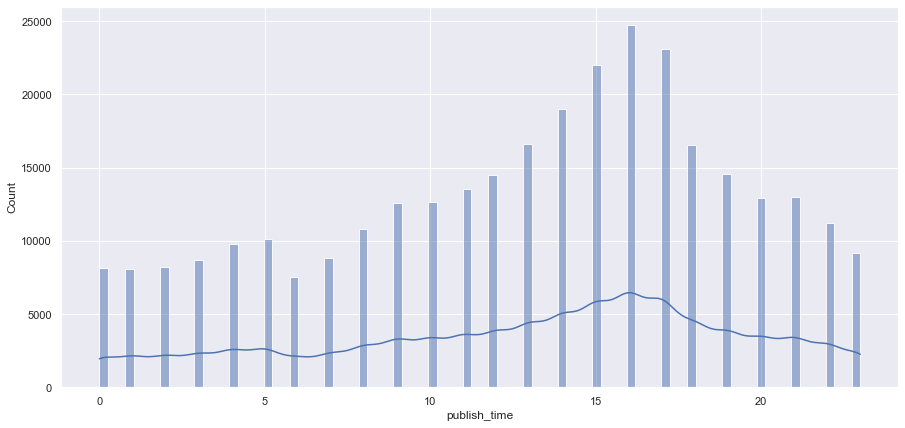

In [563]:
sns.histplot(df['publish_time'].dt.hour, kde=True)

<AxesSubplot:xlabel='publish_time', ylabel='Count'>

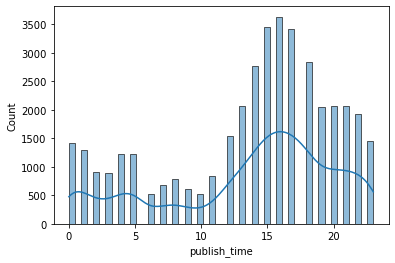

In [611]:
# but based on what we have, we can at least take the statistics to see active user counts
# it looks like videos are likely to trend around noon, with the highest peak ~4pm
# this makes sense as people are checking off work
sns.histplot(df['publish_time'].dt.hour, kde=True)

In [564]:
df.head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,description,category,country,trending_delta,like_pct,len_title,len_desc,pct_cap,qty_tags
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,US,0 days 06:46:59,95.0,35,1411,100.0,1
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21 06:47:32+00:00,"cute|""cats""|""thai""|""eggs""",98966,2486,184,532,Kittens come out of the eggs in a Thai commerc...,People & Blogs,US,206 days 17:12:28,93.0,21,103,24.0,4
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11 15:00:03+00:00,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,US,2 days 08:59:57,72.0,76,631,79.0,44


<AxesSubplot:xlabel='trending_delta'>

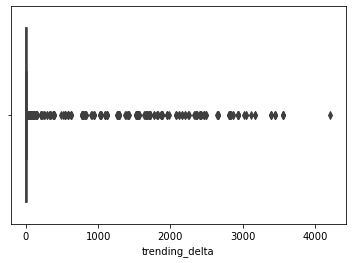

In [613]:
sns.boxplot(x=df['trending_delta'].dt.days, data=df)

In [619]:
df4 = df.copy()
df4['trending_delta'] = df4['trending_delta'].dt.days
df4 = df4.groupby('category').mean().sort_values('trending_delta', ascending=False).reset_index()
df4.head(3)

,category,views,likes,dislikes,comment_count,trending_delta,like_pct,len_title,len_desc,pct_cap,qty_tags
0,Autos & Vehicles,1.398908e+06,11505.349593,658.373984,2104.482385,43.758808,90.967480,51.070461,793.123626,22.910569,16.195122
1,Film & Animation,3.141956e+06,71692.945241,2591.907432,7756.439809,39.505432,93.736636,48.389831,1057.118902,20.958714,18.742721
2,Education,7.179818e+05,29961.548662,822.326034,3310.292579,35.642336,95.948297,43.937956,1507.070423,18.822441,21.745134


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Autos & Vehicles'),
  Text(1, 0, ' Film & Animation'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Gaming'),
  Text(5, 0, 'News & Politics'),
  Text(6, 0, 'Science & Technology'),
  Text(7, 0, 'People & Blogs'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'Entertainment'),
  Text(10, 0, 'Shows'),
  Text(11, 0, 'Comedy'),
  Text(12, 0, 'Howto & Style'),
  Text(13, 0, 'Pets & Animals'),
  Text(14, 0, 'Travel & Events'),
  Text(15, 0, 'Nonprofits & Activism')])

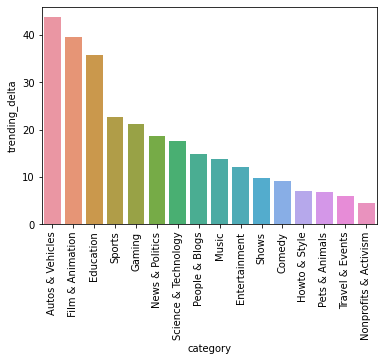

In [620]:
sns.barplot(x='category', y='trending_delta', data=df4)
plt.xticks(rotation=90)

TypeError: 'str' object is not callable

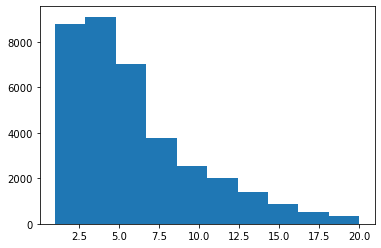

In [621]:
plt.hist(df['trending_delta'].dt.days, range=(1, 20))
plt.xlabel('# of days before viral')
plt.ylabel('videos')
plt.title('')

/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_25012/2842660229.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[us_df['category'] == c]['trending_delta'].dt.days.plot.hist(range=(1, 20))
/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_25012/2842660229.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[us_df['category'] == c]['trending_delta'].dt.days.plot.hist(range=(1, 20))
/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_25012/2842660229.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[us_df['category'] == c]['trending_delta'].dt.days.plot.hist(range=(1, 20))
/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T/ipykernel_25012/2842660229.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[us_df['category'] == c]['trending_delta'].dt.days.plot.hist(range=(1, 20))
/var/folders/qp/1k1ym6rd1z34yt05vjspksl40000gn/T

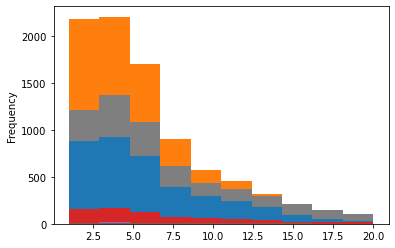

In [623]:
for c in list(df['category'].unique()):
    df[us_df['category'] == c]['trending_delta'].dt.days.plot.hist(range=(1, 20))

In [ ]:
# dont have too much of a data overload